## Capstone 3: Spotify - Similar songs with clustering 

In [36]:
# Importing all necessary libraries for our analysis
!pip install umap-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import metrics
import umap

In [2]:
# Imported dataset

data_url = 'https://github.com/jlc0523/Capstone3-Spotfiy2/blob/main/SpotifyFeatures.csv?raw=true'

df_spot = pd.read_csv(data_url)

In [3]:
# Taking a look at the dataset

df_spot.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [5]:
# Mean and median are nicely close together except for instrumentalness
# Could be due to the amount of 0 values. Might have to get rid of those rows
# OR, we could utilize dimensionality reduction techniques, like PCA

df_spot.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [6]:
df_spot.describe(include='O')

,genre,artist_name,track_name,track_id,key,mode,time_signature
count,232725,232725,232725,232725,232725,232725,232725
unique,27,14564,148615,176774,12,2,5
top,Comedy,Giuseppe Verdi,Home,3uSSjnDMmoyERaAK9KvpJR,C,Major,4/4
freq,9681,1394,100,8,27583,151744,200760


In [7]:
#no null values. nice.

df_spot.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [8]:
# Taking a look at the datatypes of each column

df_spot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [9]:
df_spot['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

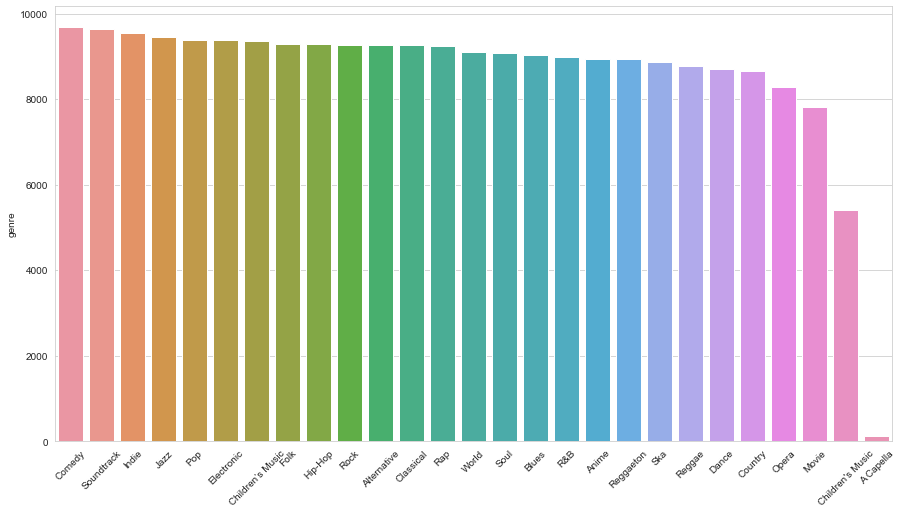

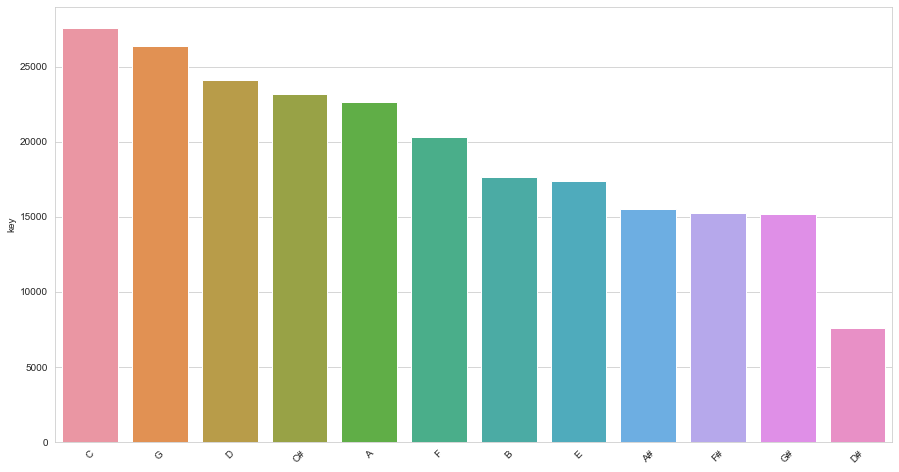

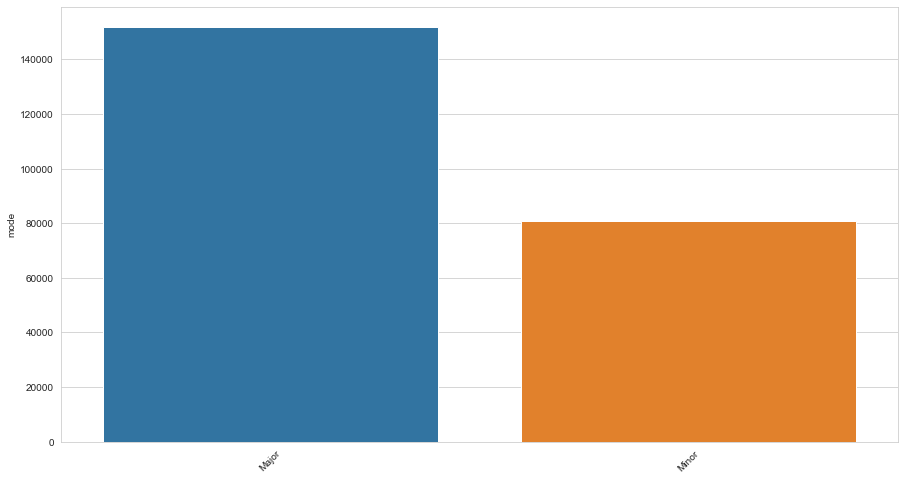

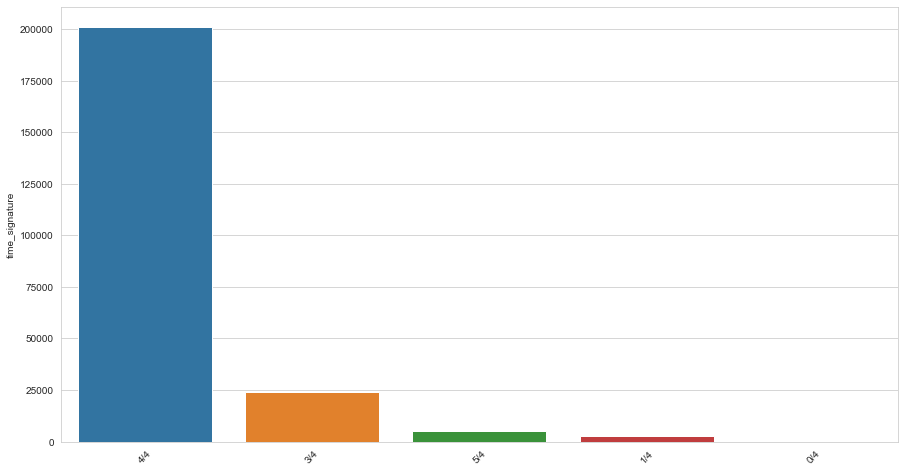

In [9]:
cols = df_spot[['genre','key','mode','time_signature']].columns.values

for col in cols:
    plt.figure(figsize=(15,8))
    sns.set_style('whitegrid')
    sns.barplot(x = df_spot[col].value_counts().index, y=df_spot[col].value_counts())
    plt.xticks(rotation = 45)
    plt.show()

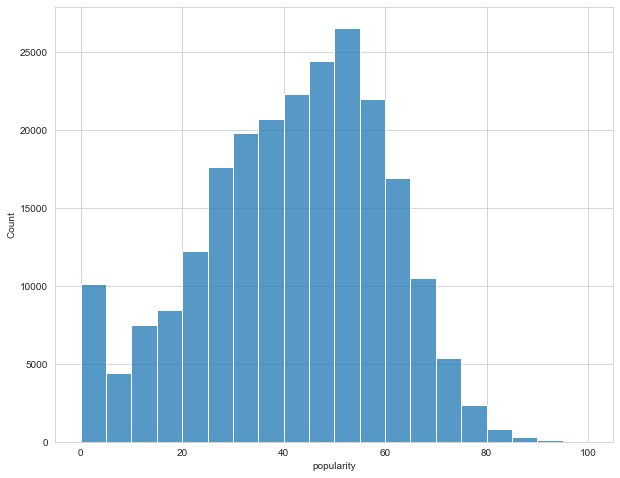

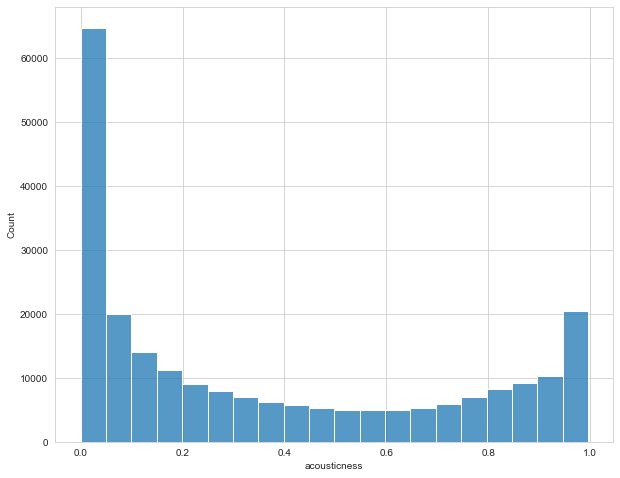

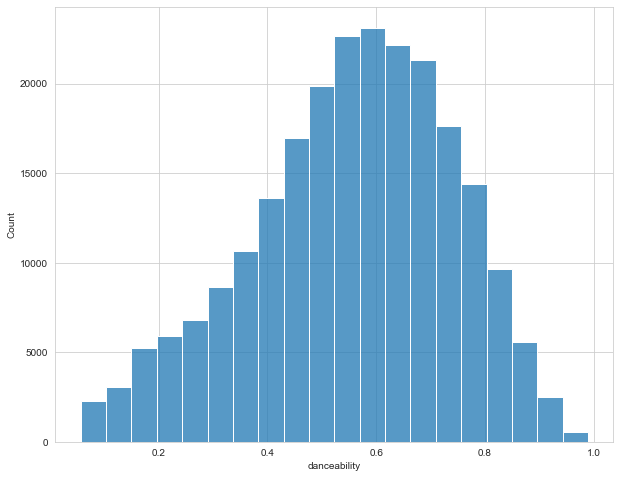

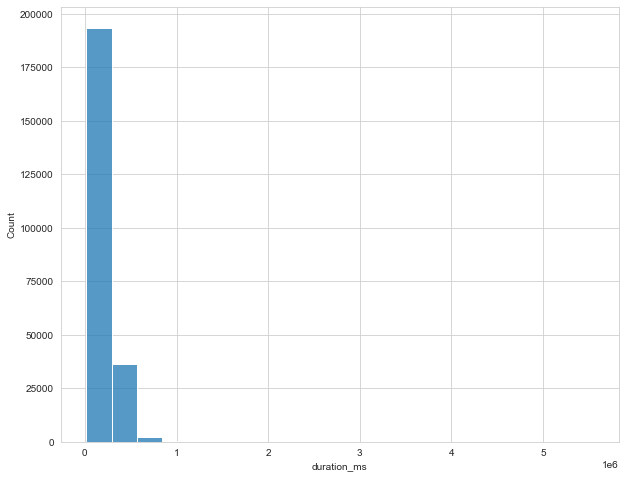

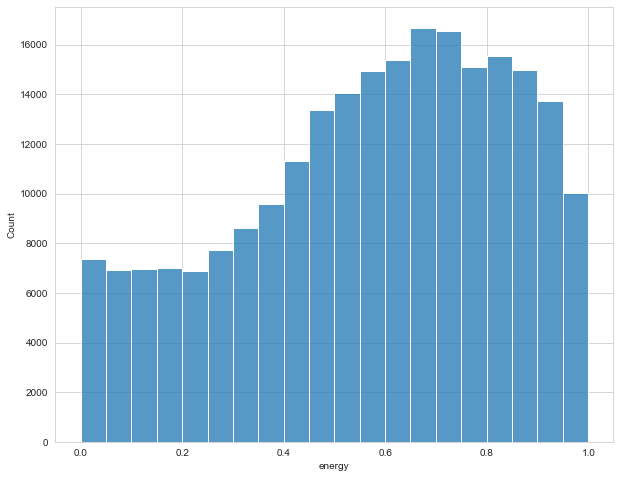

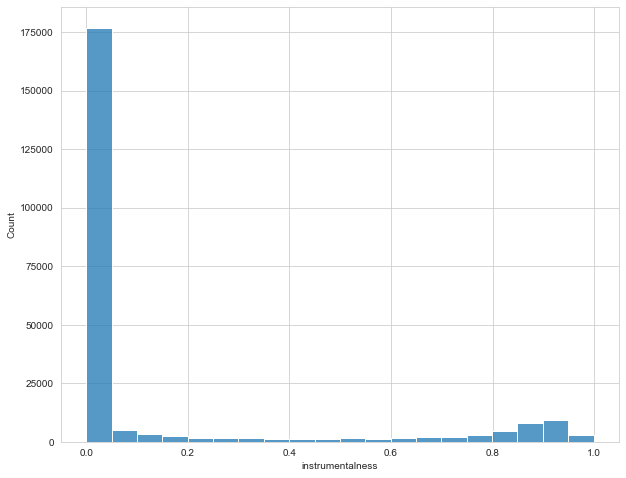

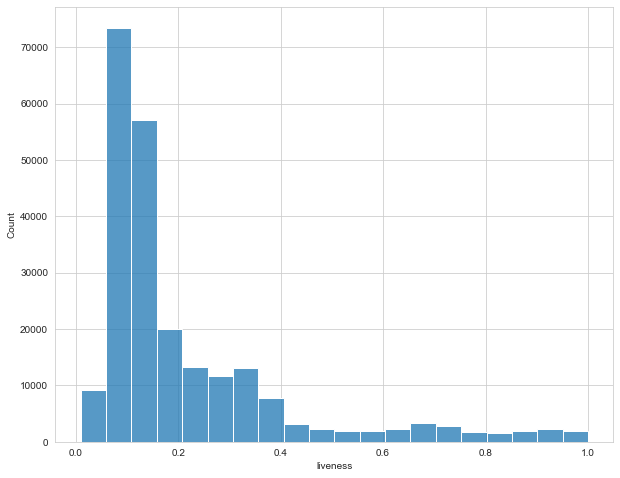

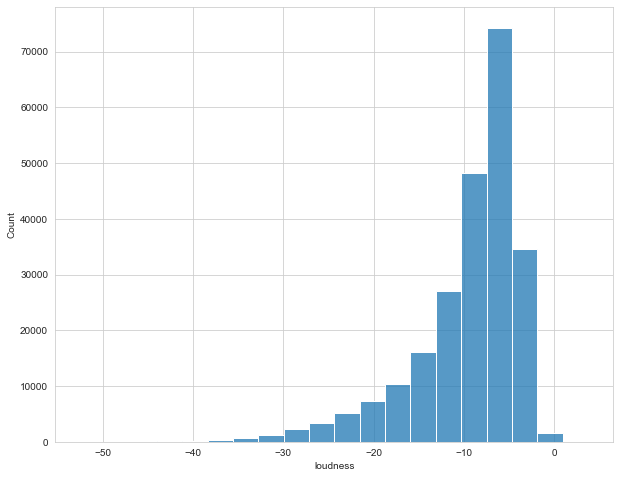

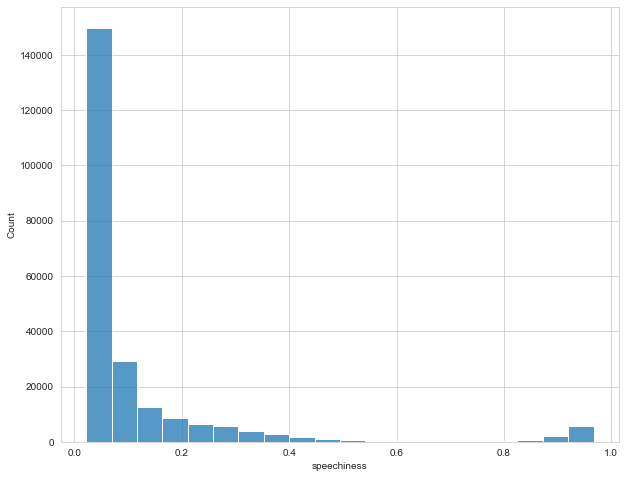

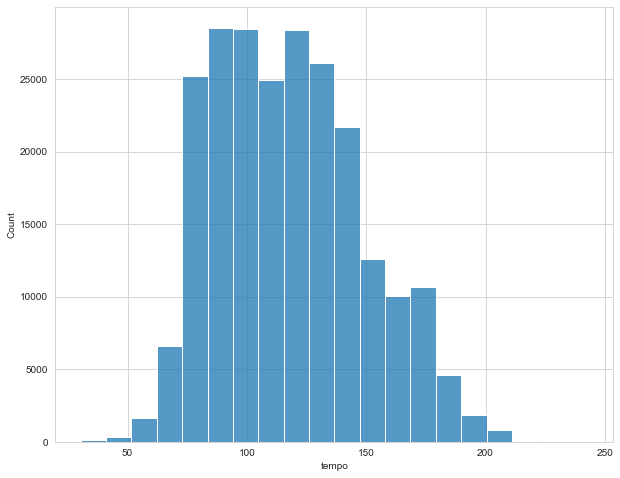

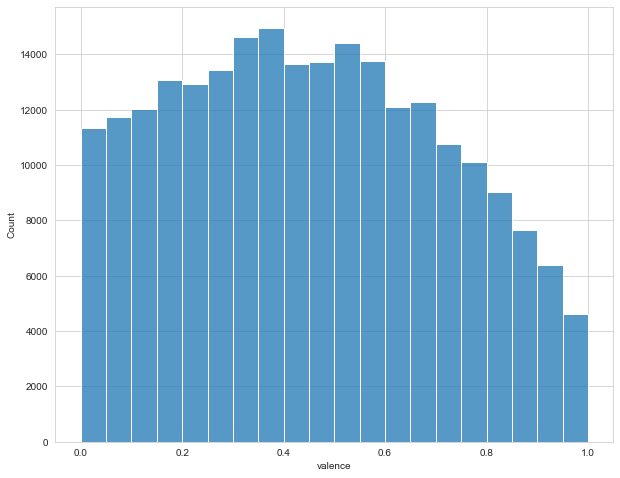

In [10]:
cols = df_spot.select_dtypes(include='number')

for col in cols:
    plt.figure(figsize=(10,8))
    sns.set_style('whitegrid')
    sns.histplot(data=df_spot, x=col, bins=20)
    plt.show()

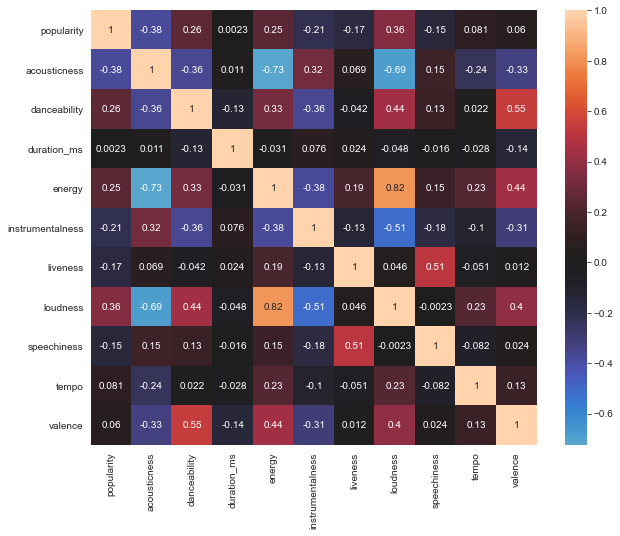

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df_spot.corr(),annot=True, center=0)
plt.show()

## Preprocessing

In [10]:
X = df_spot.select_dtypes(include='number')

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(columns=X.columns, data=X_scaled)
X_scaled_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,-2.261007,0.683376,-0.890935,-1.141368,1.286908,-0.489819,0.660661,1.290703,-0.367970,1.595607,1.380744
1,-2.206031,-0.345467,0.191994,-0.821867,0.630249,-0.489819,-0.322835,0.668683,-0.183082,1.823253,1.388435
2,-2.096080,1.644570,0.585296,-0.545298,-1.669954,-0.489819,-0.564927,-0.718402,-0.455832,-0.588326,-0.334212
3,-2.261007,0.942701,-1.693703,-0.695295,-0.929789,-0.489819,-0.587623,-0.434817,-0.438044,1.750597,-0.876384
4,-2.041104,1.638932,-1.203422,-1.282184,-1.313157,-0.083566,-0.065613,-1.930601,-0.405163,0.741433,-0.249618
...,...,...,...,...,...,...,...,...,...,...,...
232720,-0.116961,-1.028056,0.714601,0.766109,0.542948,1.306938,-0.658233,-0.176072,-0.480628,-0.068759,1.949833
232721,-0.171936,-0.946143,1.242596,0.397901,0.425281,-0.486912,0.110912,0.437780,-0.469308,-0.124166,1.976749
232722,0.322844,1.500814,-0.201309,-0.573103,-0.576788,-0.489819,-0.607797,0.214712,0.146805,-1.085205,1.376899
232723,0.157917,-0.300367,1.027088,-0.106615,0.504991,-0.489819,0.595095,0.405603,0.136025,-0.570752,0.131056


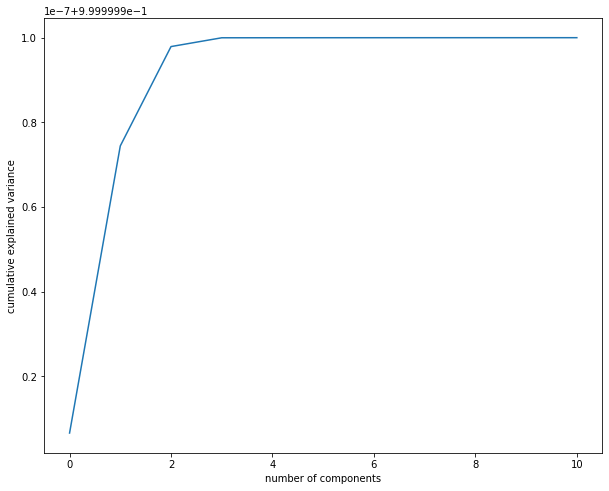

In [12]:
# From the explained variance ratio chart, we'll able to
# preserve 95% of our data variance with 2 components

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
plt.figure(figsize=(10,8))
plt.plot(cumsum)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [18]:
inertia_score = []
for i in range (1,31):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(X_pca)
    inertia_score.append(kmeans.inertia_)

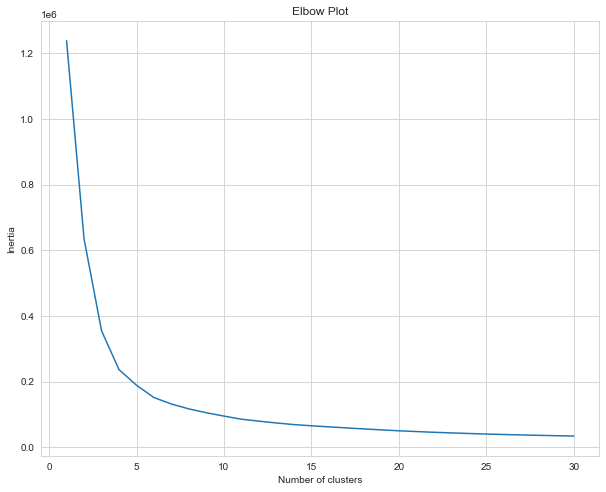

In [19]:
# based on our inertia 'elbow' plot, our data distribution 
# recommends using 6 or 7 clusters.
# however, for the outcome of our question, we will need a lot more than that

plt.figure(figsize=(10,8))
plt.plot(range(1,31), inertia_score)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [30]:
## UMAP!
## One hot encoded genres, and scaled 

umap_df = pd.get_dummies(df_spot['genre'], drop_first=True, dtype='int64')
umap_df[X_scaled_df.columns]=X_scaled_df
umap_df.head()

,Alternative,Anime,Blues,Children's Music,Children’s Music,Classical,Comedy,Country,Dance,Electronic,...,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,0,0,0,0,0,0,0,0,0,...,0.683376,-0.890935,-1.141368,1.286908,-0.489819,0.660661,1.290703,-0.367970,1.595607,1.380744
1,0,0,0,0,0,0,0,0,0,0,...,-0.345467,0.191994,-0.821867,0.630249,-0.489819,-0.322835,0.668683,-0.183082,1.823253,1.388435
2,0,0,0,0,0,0,0,0,0,0,...,1.644570,0.585296,-0.545298,-1.669954,-0.489819,-0.564927,-0.718402,-0.455832,-0.588326,-0.334212
3,0,0,0,0,0,0,0,0,0,0,...,0.942701,-1.693703,-0.695295,-0.929789,-0.489819,-0.587623,-0.434817,-0.438044,1.750597,-0.876384
4,0,0,0,0,0,0,0,0,0,0,...,1.638932,-1.203422,-1.282184,-1.313157,-0.083566,-0.065613,-1.930601,-0.405163,0.741433,-0.249618


In [15]:
X_umap = umap.UMAP(n_neighbors=7, min_dist=0.3, metric='correlation').fit_transform(umap_df)

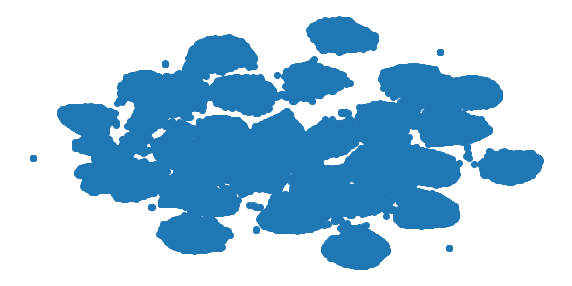

In [67]:
plt.figure(figsize=(10,5))
plt.scatter(X_umap[:, 0], X_umap[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Modeling: K-means

In [18]:
# Make a new temporary dataframe with components and cluster values

# pca_df2 = pd.DataFrame(columns=['pc0','pc1','cluster'])
# pca_df2['pca0'] = X_pca[:,0]
# pca_df2['pca1'] = X_pca[:,1]
# pca_df2['cluster'] = y_kmeans

X_pca_df = pd.get_dummies(df_spot['genre'], drop_first=True, dtype='int64')
X_pca_df['pca0'] = X_pca[:,0]
X_pca_df['pca1'] = X_pca[:,1]
X_pca_df.head()

,Alternative,Anime,Blues,Children's Music,Children’s Music,Classical,Comedy,Country,Dance,Electronic,...,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World,pca0,pca1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.990450,0.999392
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.209613,0.273042
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.112402,0.353162
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.954505,-0.186844
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.935588,0.391576


In [20]:
# K-means model creation with 500 clusters
# Disclaimer: This will take a while!

kmeans = KMeans(n_clusters=500, max_iter=300)
y_kmeans = kmeans.fit_predict(genre_df)
X_pca_df['cluster']=y_kmeans

print(genre_df.shape)
print(y_kmeans.shape)

(232725, 2)
(232725,)


In [68]:
# UMAP K-means!

kmeans = KMeans(n_clusters=500, max_iter=300)
y_kmeans_umap = kmeans.fit_predict(X_umap)

print(X_umap.shape)
print(y_kmeans_umap.shape)

(232725, 2)
(232725,)


In [78]:
## This took 20 min!
## Based on the sheer silhouette score on K-means with PCA and UMAP respectively,
## UMAP yields more favorable results in terms of dimensionality reduction 

print(metrics.silhouette_score(genre_df, y_kmeans, metric='euclidean'))
print(metrics.silhouette_score(X_umap, y_kmeans_umap, metric='euclidean'))

0.00659509268823907
0.35819656


In [69]:
kmeans_umap = pd.DataFrame(columns=['component1','component2', 'cluster'])
kmeans_umap['component1'] = X_umap[:,0]
kmeans_umap['component2'] = X_umap[:,1]
kmeans_umap['cluster'] = y_kmeans_umap

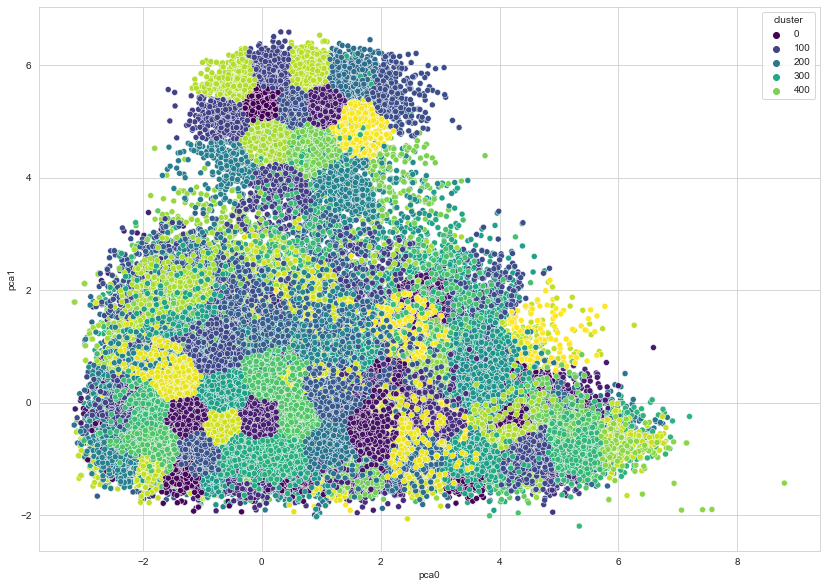

In [45]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='pca0', y='pca1', data=genre_df, hue='cluster', palette='viridis')
plt.show()

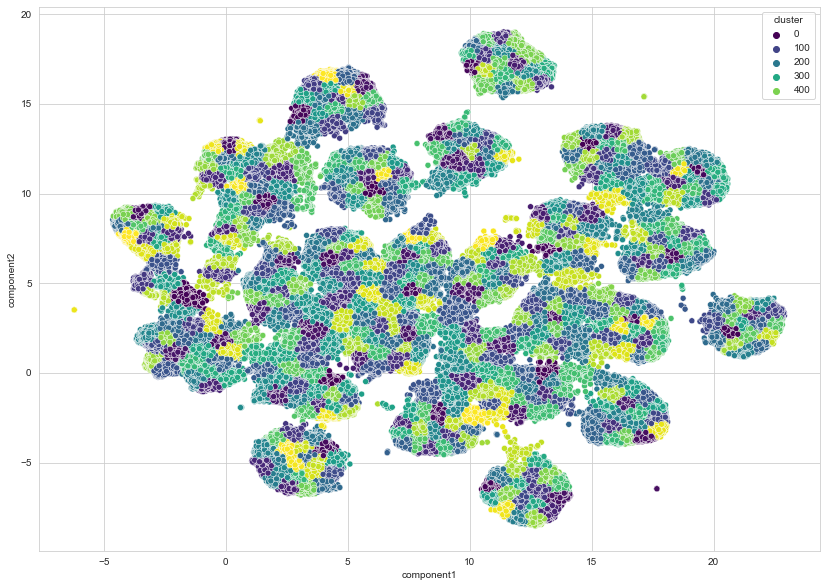

In [70]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='component1', y='component2', data=kmeans_umap, hue='cluster', palette='viridis')
plt.show()

In [23]:
genre_df['cluster'].describe()

count    232725.000000
mean        244.128216
std         144.803415
min           0.000000
25%         119.000000
50%         245.000000
75%         369.000000
max         499.000000
Name: cluster, dtype: float64

In [46]:
merged_df = pd.DataFrame(columns=['artist_name','track_name','pca0','pca1','track_id','cluster'])
merged_df['track_id'] = df_spot['track_id']
merged_df['artist_name'] = df_spot['artist_name']
merged_df['track_name'] = df_spot['track_name']
merged_df['genre'] = df_spot['genre']
merged_df['pca0'] = genre_df['pca0']
merged_df['pca1'] = genre_df['pca1']
merged_df['cluster'] = genre_df['cluster'].astype('int64')

In [72]:
merged_df_umap = pd.DataFrame(columns=['artist_name','track_name','component1','component2','track_id','cluster'])
merged_df_umap['track_id'] = df_spot['track_id']
merged_df_umap['artist_name'] = df_spot['artist_name']
merged_df_umap['track_name'] = df_spot['track_name']
merged_df_umap['genre'] = df_spot['genre']
merged_df_umap['component1'] = kmeans_umap['component1']
merged_df_umap['component2'] = kmeans_umap['component2']
merged_df_umap['cluster'] = kmeans_umap['cluster'].astype('int64')

In [47]:
merged_df.head()

,artist_name,track_name,pca0,pca1,track_id,cluster,genre
0,Henri Salvador,C'est beau de faire un Show,-0.990450,0.999392,0BRjO6ga9RKCKjfDqeFgWV,181,Movie
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),-1.209613,0.273042,0BjC1NfoEOOusryehmNudP,172,Movie
2,Joseph Williams,Don't Let Me Be Lonely Tonight,2.112402,0.353162,0CoSDzoNIKCRs124s9uTVy,10,Movie
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,1.954505,-0.186844,0Gc6TVm52BwZD07Ki6tIvf,179,Movie
4,Fabien Nataf,Ouverture,2.935588,0.391576,0IuslXpMROHdEPvSl1fTQK,417,Movie


In [74]:
# function for recommending songs based on similarity clusters

def song_recommend_pca(track_name, artist_name, limit):
    cluster_number = merged_df.loc[(merged_df['track_name']==track_name)&(merged_df['artist_name']==artist_name), 'cluster']
    cluster_df = merged_df.loc[merged_df['cluster']==cluster_number.values[0]]
    songs = cluster_df[['track_name','artist_name','genre']].sample(n=limit)
    return songs

def song_recommend_umap(track_name, artist_name, limit):
    cluster_number = merged_df_umap.loc[(merged_df_umap['track_name']==track_name)&(merged_df_umap['artist_name']==artist_name), 'cluster']
    cluster_df = merged_df_umap.loc[merged_df_umap['cluster']==cluster_number.values[0]]
    songs = cluster_df[['track_name','artist_name','genre']].sample(n=limit)
    return songs

In [75]:
song_recommend_pca('American Idiot', 'Green Day', 10)

,track_name,artist_name,genre
112094,I Love It (feat. Charli XCX) - Original Version,Icona Pop,Pop
108808,Basket Case,Green Day,Pop
109454,Puntos Suspensivos,Piso 21,Pop
111232,Stand by Me,Prince Royce,Pop
113584,A-YO,Lady Gaga,Pop
113275,Si Tú La Ves (feat. Wisin),Nicky Jam,Pop
113765,Daft Pretty Boys,Bad Suns,Pop
111064,MOVE TO MIAMI,Enrique Iglesias,Pop
112329,Father Of Mine,Everclear,Pop
112898,She Drives Me Crazy,Fine Young Cannibals,Pop


In [76]:
song_recommend_umap('American Idiot', 'Green Day', 10)

,track_name,artist_name,genre
113996,Benz Boys (feat. Ty Dolla $ign),Wiz Khalifa,Pop
111072,Amber,311,Pop
149523,Marry The Night,Lady Gaga,Pop
110469,Hold On,Jonas Brothers,Pop
110053,Color Blind,Diplo,Pop
151320,Keep Me Up,Charlotte Lawrence,Pop
111086,Dope,BTS,Pop
110602,Flexicution,Logic,Pop
112850,First Place,Larray,Pop
110824,Anything Goes,Florida Georgia Line,Pop


In [50]:
song_recommend('The Middle', 'Zedd', 10)

,track_name,artist_name,genre
13718,Stitches,Shawn Mendes,Dance
14194,New Flame,Chris Brown,Dance
14255,Kill Em With Kindness,Selena Gomez,Dance
15104,FU4E,Lost Kings,Dance
21401,All The Way,Timeflies,Dance
18768,Enola Gay - Remastered,Orchestral Manoeuvres In The Dark,Dance
14383,Cuz I Love You,Lizzo,Dance
14952,Under Control,Calvin Harris,Dance
15242,Christmas (Baby Please Come Home),Mariah Carey,Dance
17966,I Wanna Know,Alesso,Dance


In [51]:
df_spot.loc[(df_spot['track_name']=='The Middle')&(df_spot['artist_name']=='Zedd')]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9077,Dance,Zedd,The Middle,09IStsImFySgyp0pIQdqAc,87,0.171,0.753,184732,0.657,0.0,G,0.112,-3.061,Major,0.0449,107.01,4/4,0.437
107907,Pop,Zedd,The Middle,09IStsImFySgyp0pIQdqAc,88,0.171,0.753,184732,0.657,0.0,G,0.112,-3.061,Major,0.0449,107.01,4/4,0.437


In [52]:
df_spot.loc[(df_spot['track_name']=='Just the Way You Are')&(df_spot['artist_name']=='Bruno Mars')]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9097,Dance,Bruno Mars,Just the Way You Are,7BqBn9nzAq8spo5e7cZ0dJ,80,0.0151,0.637,220733,0.843,0.0,F,0.0876,-5.413,Major,0.0432,109.012,4/4,0.434
108001,Pop,Bruno Mars,Just the Way You Are,7BqBn9nzAq8spo5e7cZ0dJ,80,0.0151,0.637,220733,0.843,0.0,F,0.0876,-5.413,Major,0.0432,109.012,4/4,0.434


## Modeling: DBSCAN

In [19]:
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

In [20]:
pca_clusters = dbscan_cluster.fit_predict(X_pca_df)

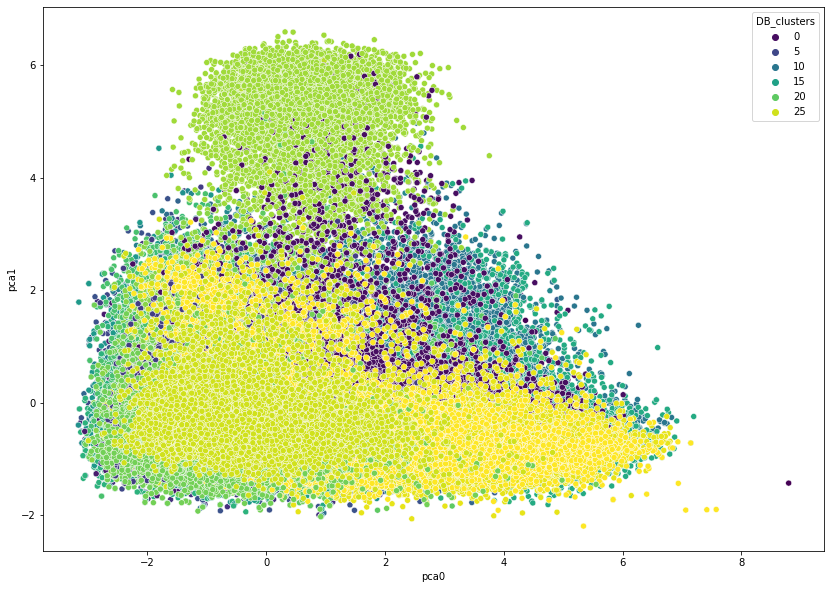

In [25]:
X_pca_df['DB_clusters']=pca_clusters

plt.figure(figsize=(14,10))
sns.scatterplot(x='pca0', y='pca1', data=X_pca_df, hue='DB_clusters', palette='viridis')
plt.show()

In [35]:
tsne_df = pd.get_dummies(df_spot['genre'], drop_first=True, dtype='int64')
tsne_df[X_scaled_df.columns]=X_scaled_df
tsne_df

,Alternative,Anime,Blues,Children's Music,Children’s Music,Classical,Comedy,Country,Dance,Electronic,...,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,0,0,0,0,0,0,0,0,0,...,0.683376,-0.890935,-1.141368,1.286908,-0.489819,0.660661,1.290703,-0.367970,1.595607,1.380744
1,0,0,0,0,0,0,0,0,0,0,...,-0.345467,0.191994,-0.821867,0.630249,-0.489819,-0.322835,0.668683,-0.183082,1.823253,1.388435
2,0,0,0,0,0,0,0,0,0,0,...,1.644570,0.585296,-0.545298,-1.669954,-0.489819,-0.564927,-0.718402,-0.455832,-0.588326,-0.334212
3,0,0,0,0,0,0,0,0,0,0,...,0.942701,-1.693703,-0.695295,-0.929789,-0.489819,-0.587623,-0.434817,-0.438044,1.750597,-0.876384
4,0,0,0,0,0,0,0,0,0,0,...,1.638932,-1.203422,-1.282184,-1.313157,-0.083566,-0.065613,-1.930601,-0.405163,0.741433,-0.249618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,0,0,0,0,0,0,0,0,0,0,...,-1.028056,0.714601,0.766109,0.542948,1.306938,-0.658233,-0.176072,-0.480628,-0.068759,1.949833
232721,0,0,0,0,0,0,0,0,0,0,...,-0.946143,1.242596,0.397901,0.425281,-0.486912,0.110912,0.437780,-0.469308,-0.124166,1.976749
232722,0,0,0,0,0,0,0,0,0,0,...,1.500814,-0.201309,-0.573103,-0.576788,-0.489819,-0.607797,0.214712,0.146805,-1.085205,1.376899
232723,0,0,0,0,0,0,0,0,0,0,...,-0.300367,1.027088,-0.106615,0.504991,-0.489819,0.595095,0.405603,0.136025,-0.570752,0.131056


In [38]:
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 250)
tsne_results = tsne.fit_transform(tsne_df)

print('Time: {}'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 232725 samples in 2.475s...
[t-SNE] Computed neighbors for 232725 samples in 1177.659s...
[t-SNE] Computed conditional probabilities for sample 1000 / 232725
[t-SNE] Computed conditional probabilities for sample 2000 / 232725
[t-SNE] Computed conditional probabilities for sample 3000 / 232725
[t-SNE] Computed conditional probabilities for sample 4000 / 232725
[t-SNE] Computed conditional probabilities for sample 5000 / 232725
[t-SNE] Computed conditional probabilities for sample 6000 / 232725
[t-SNE] Computed conditional probabilities for sample 7000 / 232725
[t-SNE] Computed conditional probabilities for sample 8000 / 232725
[t-SNE] Computed conditional probabilities for sample 9000 / 232725
[t-SNE] Computed conditional probabilities for sample 10000 / 232725
[t-SNE] Computed conditional probabilities for sample 11000 / 232725
[t-SNE] Computed conditional probabilities for sample 12000 / 232725
[t-SNE] Computed conditional pro

In [39]:
tsne_clusters = dbscan_cluster.fit_predict(tsne_df)

In [40]:
tsne_dbscan = pd.DataFrame(columns=['component1','component2','cluster'])
tsne_dbscan['component1']=tsne_results[:,0]
tsne_dbscan['component2']=tsne_results[:,1]
tsne_dbscan['cluster']=tsne_clusters

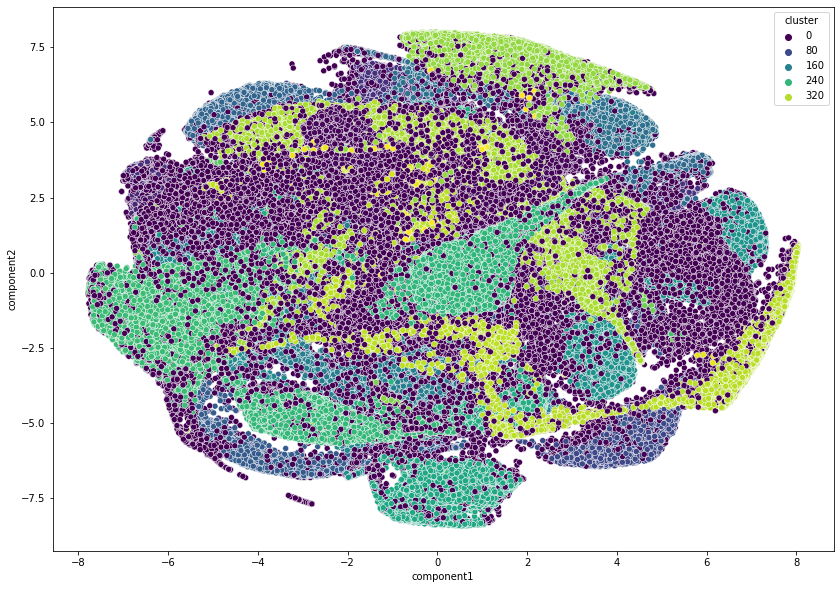

In [41]:
# Wow... this looks... different

plt.figure(figsize=(14,10))
sns.scatterplot(x='component1', y='component2', data=tsne_dbscan, hue='cluster', palette='viridis')
plt.show()

In [42]:
print(metrics.silhouette_score(X_pca_df, pca_clusters, metric='euclidean'))
print(metrics.silhouette_score(tsne_df, tsne_clusters, metric='euclidean'))

0.3923039329025956
-0.2762209490320747


In [43]:
merged_dbpca = pd.DataFrame(columns=['artist_name','track_name','pca0','pca1','track_id','cluster'])
merged_dbpca['track_id'] = df_spot['track_id']
merged_dbpca['artist_name'] = df_spot['artist_name']
merged_dbpca['track_name'] = df_spot['track_name']
merged_dbpca['genre'] = df_spot['genre']
merged_dbpca['pca0'] = X_pca_df['pca0']
merged_dbpca['pca1'] = X_pca_df['pca1']
merged_dbpca['cluster'] = X_pca_df['DB_clusters'].astype('int64')

In [44]:
merged_dbtsne = pd.DataFrame(columns=['artist_name','track_name','pca0','pca1','track_id','cluster'])
merged_dbtsne['track_id'] = df_spot['track_id']
merged_dbtsne['artist_name'] = df_spot['artist_name']
merged_dbtsne['track_name'] = df_spot['track_name']
merged_dbtsne['genre'] = df_spot['genre']
merged_dbtsne['pca0'] = tsne_dbscan['component1']
merged_dbtsne['pca1'] = tsne_dbscan['component2']
merged_dbtsne['cluster'] = tsne_dbscan['cluster'].astype('int64')

In [45]:
def song_recommend_pca_db(track_name, artist_name, limit):
    cluster_number = merged_dbpca.loc[(merged_dbpca['track_name']==track_name)&(merged_dbpca['artist_name']==artist_name), 'cluster']
    cluster_df = merged_dbpca.loc[merged_dbpca['cluster']==cluster_number.values[0]]
    songs = cluster_df[['track_name','artist_name','genre']].sample(n=limit)
    return songs

def song_recommend_tsne_db(track_name, artist_name, limit):
    cluster_number = merged_dbtsne.loc[(merged_dbtsne['track_name']==track_name)&(merged_dbtsne['artist_name']==artist_name), 'cluster']
    cluster_df = merged_dbtsne.loc[merged_dbtsne['cluster']==cluster_number.values[0]]
    songs = cluster_df[['track_name','artist_name','genre']].sample(n=limit)
    return songs

In [46]:
song_recommend_pca_db('Payphone', 'Maroon 5', 10)

,track_name,artist_name,genre
152062,Making Plans For Nigel,XTC,Pop
108011,Freaky Friday (feat. Chris Brown),Lil Dicky,Pop
111562,Summer Friends (feat. Jeremih & Francis & The ...,Chance the Rapper,Pop
112610,Pornography,Travis Scott,Pop
113612,Hello My Love,Westlife,Pop
151372,Back In The City,Alejandro Sanz,Pop
149678,Loco,Enrique Iglesias,Pop
110054,El de la Gorra 27,Lenin Ramírez,Pop
108917,Glad You Came,The Wanted,Pop
111069,Me Enamoré,Shakira,Pop


In [47]:
song_recommend_tsne_db('Mr. Blue Sky', 'Electric Light Orchestra', 10)

,track_name,artist_name,genre
6603,Autumn Sweater,Yo La Tengo,Alternative
101847,Psalm 45 (Live),Shane & Shane,Children’s Music
207633,Gracia Sublime Es,En Espíritu Y En Verdad,World
35840,Dareka Umiwo - TV Size,Aimer,Anime
206605,On the Move,David Arnold & Michael Price,Soundtrack
182339,"Friends on the Other Side - From ""The Princess...",Keith David,Movie
9874,Child Please,Tierra Whack,Alternative
195675,Act I Finale,Howard Ashman,Movie
142968,Jacksonville,Sufjan Stevens,Indie
199447,Stairs and Rooftops,Lorne Balfe,Soundtrack



## Conclusion

For now, this model works well for me. It suggests a number of songs that are similar to the input song, with and without consideration of genre (I prefer the one with genre), but I wouldn't say this model does well without exploring all the options, AND I get favorable feedback from consumers using this model. 

As for which model I would consider using, based on the silhouette scores and similar songs I got from the functions, I would elect to use either DBSCAN with PCA, which got a silhouette score of 0.392, or K-means with UMAP, which got a silhouette score of 0.358. The other models had near 0 silhouette scores, and given that for this process, I want to maximize number of clusters so that the most similar songs become clustered for the function to refer to, I expected to have a lower silhouette score than a well performing model. Therefore, I used the silhouette score as a means of comparing multiple model performances.

I think for the future, I would like to incorporate, instead of clustering, a distance similarity matrix, such as cosine similarity or a good ol' euclidean distance. But, considering how long fitting and predicting cluster values for the modesl took, I would expect the distance matrix to take as long, if not longer, time.
